# Project Overview
## In this project, you will work with a real-world dataset. Your task is to clean the data and create visualizations to uncover insights. We will use Python and popular libraries such as Pandas and Matplotlib.

In [35]:
#IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np


#LOAD THE DATASET
df = pd.read_csv('computer_sales.csv')

#display the first few rows of the dataset
df.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


## Exploring the Data

In [36]:
#exploring the data

#check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sale ID       102 non-null    int64  
 1   Contact       102 non-null    object 
 2   Sex           102 non-null    object 
 3   Age           102 non-null    int64  
 4   State         102 non-null    object 
 5   Product ID    102 non-null    object 
 6   Product Type  102 non-null    object 
 7   Sale Price    102 non-null    float64
 8   Profit        102 non-null    float64
 9   Lead          102 non-null    object 
 10  Month         102 non-null    object 
 11  Year          102 non-null    int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 9.7+ KB


In [37]:
#summary statistics
df.describe()

,Sale ID,Age,Sale Price,Profit,Year
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,44.980392,948.715490,157.050784,2018.803922
std,29.588849,10.015810,614.565244,120.843575,0.745139
min,1.000000,23.000000,189.990000,20.890000,2018.000000
25%,26.250000,38.500000,612.490000,98.902500,2018.000000
50%,51.500000,46.000000,889.990000,139.490000,2019.000000
75%,76.750000,52.000000,1049.990000,178.602500,2019.000000
max,102.000000,57.000000,3479.990000,1043.390000,2020.000000


# Handling Missing Data

In [38]:
#check for missing values
df.isnull().sum()

Sale ID         0
Contact         0
Sex             0
Age             0
State           0
Product ID      0
Product Type    0
Sale Price      0
Profit          0
Lead            0
Month           0
Year            0
dtype: int64

In [46]:
#remove rows with missing values
df_cleaned = df.dropna()


df_cleaned.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


## Dealing with Outliers

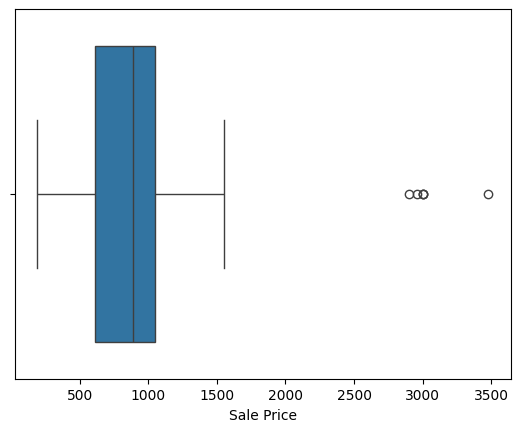

In [47]:
#dealing with outliers

import matplotlib.pyplot as plt
import seaborn as sns


#Box plot to visualize outliers in 'Price' column
sns.boxplot(x=df_cleaned['Sale Price'])
plt.show()


#Remove outliers using IQR method
Q1 = df_cleaned['Sale Price'].quantile(0.25)
Q3 = df_cleaned['Sale Price'].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df_cleaned[~((df_cleaned['Sale Price'] < (Q1 - 1.5 * IQR)) | (df_cleaned['Sale Price'] > (Q3 + 1.5 * IQR)))] 


## Data Transformation

In [48]:
df_cleaned.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [49]:
df_cleaned.shape

(96, 12)

In [50]:
#convert categorical data to numerical data
df_cleaned = pd.get_dummies(df_cleaned, columns=['Lead', 'Sex', 'State', 'Product Type'])
df_cleaned.head()

,Sale ID,Contact,Age,Product ID,Sale Price,Profit,Month,Year,Lead_Email,Lead_Flyer 1,...,Lead_Website,Sex_F,Sex_M,State_NY,State_OH,State_PA,State_WV,Product Type_Desktop,Product Type_Laptop,Product Type_Tablet
0,1,Paul Thomas,43,M01-F0024,479.99,143.39,January,2018,False,False,...,True,False,True,False,True,False,False,True,False,False
1,2,Margo Simms,37,GT13-0024,1249.99,230.89,January,2018,False,False,...,False,True,False,False,False,False,True,True,False,False
2,3,Sam Stine,26,I3670,649.99,118.64,February,2018,False,False,...,True,False,True,False,False,True,False,True,False,False
3,4,Moe Eggert,35,I3593,399.99,72.09,March,2018,False,False,...,True,False,True,False,False,True,False,False,True,False
4,5,Jessica Elk,55,15M-ED,699.99,98.09,March,2018,False,False,...,False,True,False,False,False,True,False,False,True,False


In [51]:
#Normalize Numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_cleaned[['Sale Price', 'Age']] = scaler.fit_transform(df_cleaned[['Sale Price', 'Age']])

df_cleaned.head()

,Sale ID,Contact,Age,Product ID,Sale Price,Profit,Month,Year,Lead_Email,Lead_Flyer 1,...,Lead_Website,Sex_F,Sex_M,State_NY,State_OH,State_PA,State_WV,Product Type_Desktop,Product Type_Laptop,Product Type_Tablet
0,1,Paul Thomas,-0.199943,M01-F0024,-1.065776,143.39,January,2018,False,False,...,True,False,True,False,True,False,False,True,False,False
1,2,Margo Simms,-0.787532,GT13-0024,1.369530,230.89,January,2018,False,False,...,False,True,False,False,False,False,True,True,False,False
2,3,Sam Stine,-1.864778,I3670,-0.528111,118.64,February,2018,False,False,...,True,False,True,False,False,True,False,True,False,False
3,4,Moe Eggert,-0.983395,I3593,-1.318795,72.09,March,2018,False,False,...,True,False,True,False,False,True,False,False,True,False
4,5,Jessica Elk,0.975234,15M-ED,-0.369974,98.09,March,2018,False,False,...,False,True,False,False,False,True,False,False,True,False


# Creating Visualizations

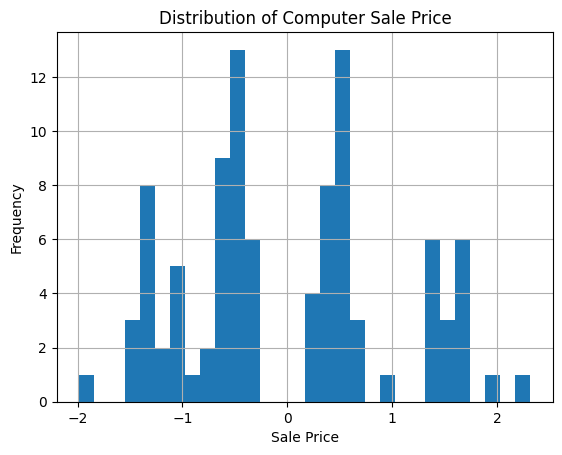

In [52]:
# Histogram of 'Sale Price'

df_cleaned['Sale Price'].hist(bins=30)
plt.title('Distribution of Computer Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

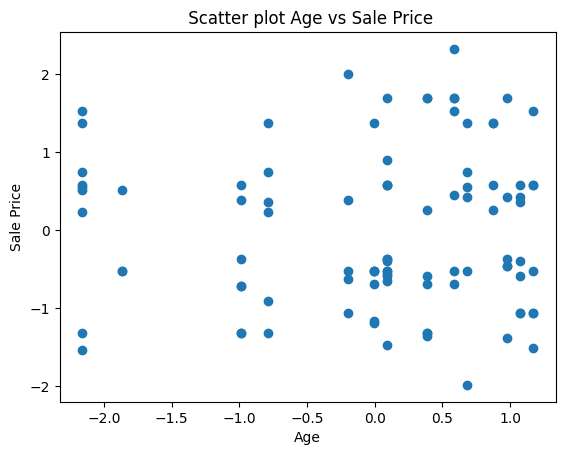

In [54]:
# Scatter plot of 'Age' vs 'Sale Price'
plt.scatter(df_cleaned['Age'], df_cleaned['Sale Price'])
plt.title(' Scatter plot Age vs Sale Price')
plt.xlabel('Age')
plt.ylabel('Sale Price')
plt.show()

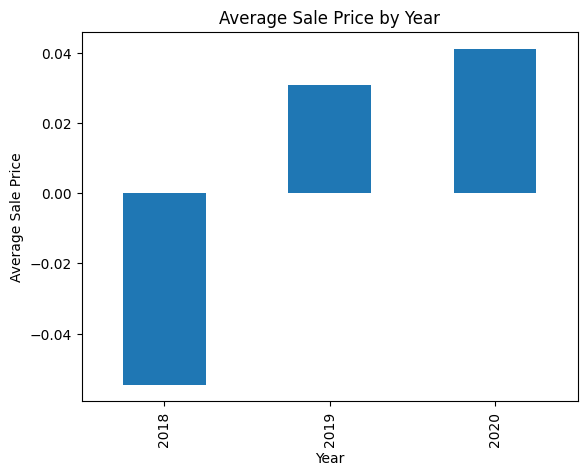

In [ ]:
# Bar plot of average 'Sale Price' by 'Year'
df_cleaned.groupby('Year')['Sale Price'].mean().plot(kind='bar')
plt.title('Average Sale Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.show()